### Introcucción

Para el presente trabajo, se extrajo información en la que se muestra las ventas en formato físico de juegos publicados tomando como primer año 1980 el que se utilizará en este trabajo extendiendo el análisis hasta el año 2016.
Además, se tiene en cuenta las ventas discriminado por regiones, la plataforma en que lanzó, genero, desarrollador, editor y la valoración de la crítica. Cabe destacar que solo se contemplan las ventas de unidades físicas de juegos, quedando fuera de este análisis las ventas de juegos en formato digital, servicios de suscripción, juego en la nube, y juegos móviles.  


### Objetivo

La finalidad del presente trabajo es brindarle a los encargados de la toma de desiciones una herramienta que les permitirá estimar el volumen de ventas (fisicas) del juego a publicar en las distintas regiones, y así ver la factibilidad de llevar adelante el proyecto, determinar si la distribución se hará a nivel mundial o solamente en determinadas regiones, como también si se incluirá una traducción del juego o no.

Para alcanzar los objetivos propuestos, se utilizará un enfoque analítico que combina análisis descriptivo e inferencial de datos. En primer lugar, se llevará a cabo un análisis exhaustivo de la evolución histórica de la industria de los videojuegos, examinando cómo han variado las tendencias de ventas a lo largo de los años y la distribución geográfica de estas en diferentes regiones. Posteriormente, se aplicarán técnicas de regresión, para modelar la relación entre diversas variables relevantes y el volumen de ventas esperado en cada región. Este enfoque permitirá identificar patrones y tendencias significativas en los datos, así como estimar con precisión el potencial de ventas del juego a publicar en distintos mercados, facilitando así la toma de decisiones estratégicas sobre la distribución global del producto y la necesidad de incluir traducciones para satisfacer las preferencias locales de los usuarios.

### Hipótesis

Factores como la plataforma de lanzamiento, la región y el género del juego ¿Pueden ser predictores importantes del éxito de ventas en regiones específicas?

# EDA

### Carga de librerías

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importo Dataset

In [54]:
juegosCompleto = pd.read_excel("Dataset_Original_limpio.xlsx")

### Dimensiones y muestra del Dataframe

In [55]:
juegosCompleto.shape

(16562, 17)

In [56]:
juegosCompleto.head()

,Name,Company,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Nintendo,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,Nintendo,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Nintendo,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Nintendo,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,Nintendo,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


### Agrego columna ventaOccidente

Para el trabajo se dividirán en 2 grandres regiones, por un lado Occidente y por el otro lado Japón, en este paso estoy generando las ventas de occidente y para eso sumo las ventas de Norte America (NA_Sales), Europa (EU_Sales), y el resto del mundo (Other_Sales)

In [57]:
juegosCompleto['ventaOccidente'] = juegosCompleto['NA_Sales'] + juegosCompleto['EU_Sales'] + juegosCompleto['Other_Sales']
juegosCompleto.sample(5)

,Name,Company,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,ventaOccidente
1590,Pokemon Super Mystery Dungeon,Nintendo,3DS,2015,Role-Playing,Nintendo,0.48,0.35,0.34,0.08,1.25,69.0,44.0,8.8,190.0,"Spike Chunsoft Co. Ltd., Spike Chunsoft",E,0.91
2054,1942,Nintendo,NES,1985,Shooter,Capcom,0.65,0.14,0.21,0.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,0.79
3961,Tactics Ogre: The Knight of Lodis,Nintendo,GBA,2001,Role-Playing,Nintendo,0.13,0.05,0.31,0.01,0.50,88.0,20.0,9.1,26.0,Quest,E,0.19
1929,Mortal Kombat: Armageddon,Sony,PS2,2006,Fighting,Midway Games,0.88,0.04,0.00,0.14,1.06,75.0,43.0,8.5,84.0,Midway,M,1.06
16283,Whac-A-Mole,Nintendo,GBA,2005,Puzzle,Zoo Digital Publishing,0.01,0.00,0.00,0.00,0.01,NaN,NaN,tbd,NaN,DC Studios,E,0.01


### Filtro el dataset con las 3 compañias que voy analizar (Sony, Microsoft, Nintendo, otros)

A lo largo de los años hubo muchas empresas que han intentado lanzar sus propias consolas que no les fue bien y que no sirven para un analisis actual es por eso que en este paso se crea un nuevo dataframe que diferencia las 3 compañias que se dividen el mercado de consolas actualmente y al resto se las denomina como "Others", pudiendo filtrarlas en las visualizaciones que sean necesarias.


In [58]:
dsJuegosFiltrado = juegosCompleto.copy()

# Compañías que voy a utilizar en mi analisis: Nintendo, Sony y Microsoft
companias_permitidas = ['Nintendo', 'Sony', 'Microsoft']

dsJuegosFiltrado.loc[~dsJuegosFiltrado['Company'].isin(companias_permitidas), 'Company'] = 'Others'

In [59]:
dsJuegosFiltrado.sample(10)

,Name,Company,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,ventaOccidente
10549,Master of the Monster Lair,Nintendo,DS,2007,Role-Playing,Rising Star Games,0.09,0.00,0.00,0.01,0.10,56.0,8.0,tbd,NaN,Global A,E10+,0.10
11307,Strider 2,Sony,PS,2000,Platform,Virgin Interactive,0.05,0.03,0.00,0.01,0.08,69.0,15.0,8.1,11.0,Capcom,E,0.09
15020,Rugby Challenge 3,Microsoft,X360,2016,Sports,Alternative Software,0.00,0.02,0.00,0.00,0.02,NaN,NaN,tbd,NaN,Wicked Witch Software,E,0.02
13132,Alter Echo,Microsoft,XBOX,2003,Shooter,THQ,0.04,0.01,0.00,0.00,0.05,62.0,24.0,tbd,NaN,Outrage Games,T,0.05
779,NBA 2K12,Sony,PS3,2011,Sports,Take-Two Interactive,1.62,0.26,0.05,0.18,2.11,90.0,38.0,6.7,127.0,Visual Concepts,E,2.06
14398,Ratatouille,Others,PC,2007,Action,THQ,0.01,0.01,0.00,0.00,0.03,NaN,NaN,7.9,9.0,Asobo Studio,E,0.02
9102,The Operative: No One Lives Forever,Sony,PS2,2002,Shooter,Electronic Arts,0.07,0.05,0.00,0.02,0.14,67.0,23.0,8,16.0,Monolith Productions,T,0.14
917,Hot Shots Golf 2,Sony,PS,1999,Sports,Sony Computer Entertainment,0.25,0.12,1.48,0.03,1.88,NaN,NaN,NaN,NaN,NaN,NaN,0.40
5676,MLB 07: The Show,Sony,PS3,2007,Sports,Sony Computer Entertainment,0.29,0.00,0.00,0.02,0.31,77.0,30.0,7.5,17.0,SCEA San Diego Studios,E,0.31
12316,TrackMania Turbo,Microsoft,XOne,2016,Action,Ubisoft,0.02,0.04,0.00,0.00,0.06,76.0,12.0,7.7,27.0,Nadeo,E,0.06


# Visualizaciones evolución historica

### 01 - Cantidad de juegos publicados por año

A continuación se mostrará la cantidad de juegos juegos que fueron publicados en cada año.

Como primer medida se crea un dataframe agrupando por año y juego.

Y luego en segunda instancia se configura un histograma y se visualiza.

In [69]:
JuegosPublicado = dsJuegosFiltrado.groupby(['Year_of_Release', 'Name']).size().reset_index(name='Cantidad de Plataforma')
JuegosPublicado.sample(10)

,Year_of_Release,Name,Cantidad de Plataforma
8087,2009,Hirameki Action: Chibikko Wagyan no Daiki na B...,1
10918,2013,Daigasso! Band Brothers P,1
7386,2008,Prince of Persia 2008,1
5830,2007,Age of Empires III: Gold Edition,1
4957,2005,Suzuki TT Superbikes,1
10894,2013,Batman: Arkham Origins,4
8264,2009,Monster Mayhem: Build and Battle,2
1349,1998,Gex: Enter the Gecko,1
1276,1998,Bomberman Party Edition,1
3850,2003,Winning Post 6,1


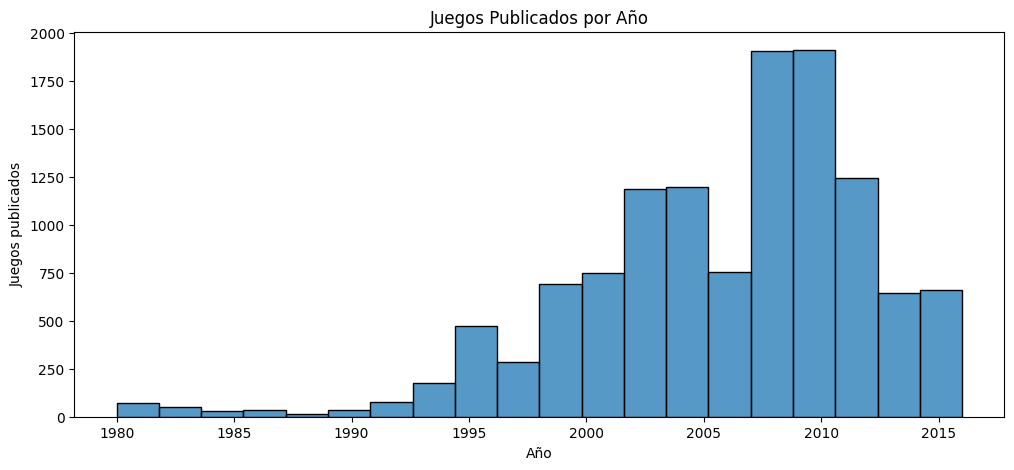

In [76]:
plt.figure(figsize=(12, 5))
sns.histplot(data=JuegosPublicado, x='Year_of_Release', bins=20)
plt.title('Juegos Publicados por Año')
plt.xlabel('Año')
plt.ylabel('Juegos publicados')
plt.show()

### 02 - Ventas de las compañías por año

A continuación se mostrará como fueron las ventas año a año, en una primera visualización se muestra las ventas totales y en una segunda visualización se muestra las ventas anuales de las empresas a travez de un subgrafico de líneas.

Como primer medida se crea un dataframe agrupando por año y compañias mostrando la sumatoria de las ventas globales y se muestra.

Y luego en segunda instancia de configura el subgrafico y se visualiza.

In [73]:
ventasPorAño = dsJuegosFiltrado.groupby(['Year_of_Release', 'Company'])['Global_Sales'].sum().reset_index()
ventasPorAño = ventasPorAño.pivot_table(index='Year_of_Release', columns='Company', values='Global_Sales', fill_value=0)
ventasPorAño['Total_Sales'] = ventasPorAño['Nintendo'] + ventasPorAño['Sony'] + ventasPorAño['Microsoft'] + ventasPorAño['Others']
ventasPorAño.head()

Company,Microsoft,Nintendo,Others,Sony,Total_Sales
Year_of_Release,,,,,
1980,0.0,0.00,21.89,0.0,21.89
1981,0.0,0.00,35.77,0.0,35.77
1982,0.0,0.00,28.86,0.0,28.86
1983,0.0,10.96,5.83,0.0,16.79
1984,0.0,50.09,0.27,0.0,50.36


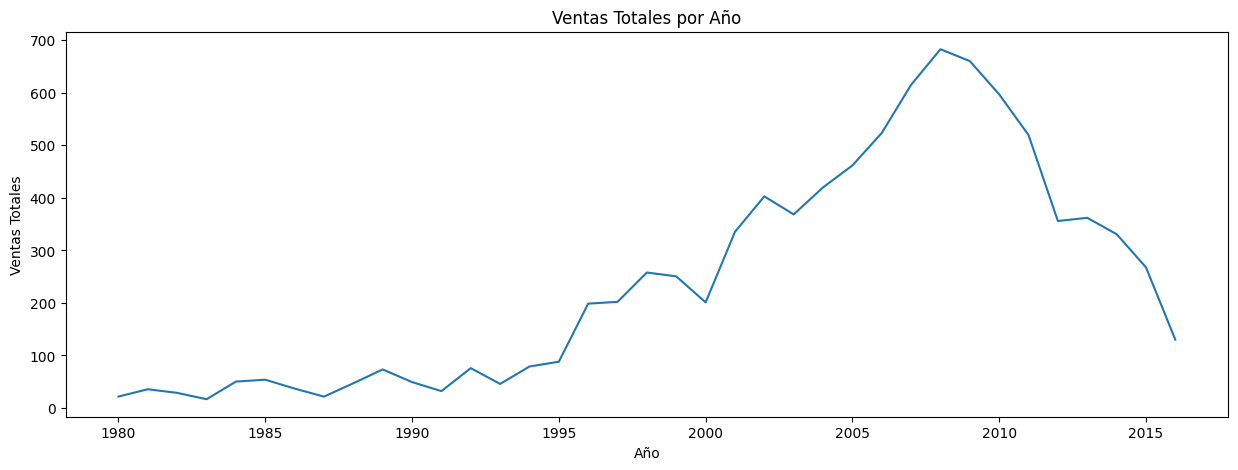

In [80]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=ventasPorAño, x='Year_of_Release', y='Total_Sales')
plt.title('Ventas Totales por Año')
plt.xlabel('Año')
plt.ylabel('Ventas Totales')
plt.show()

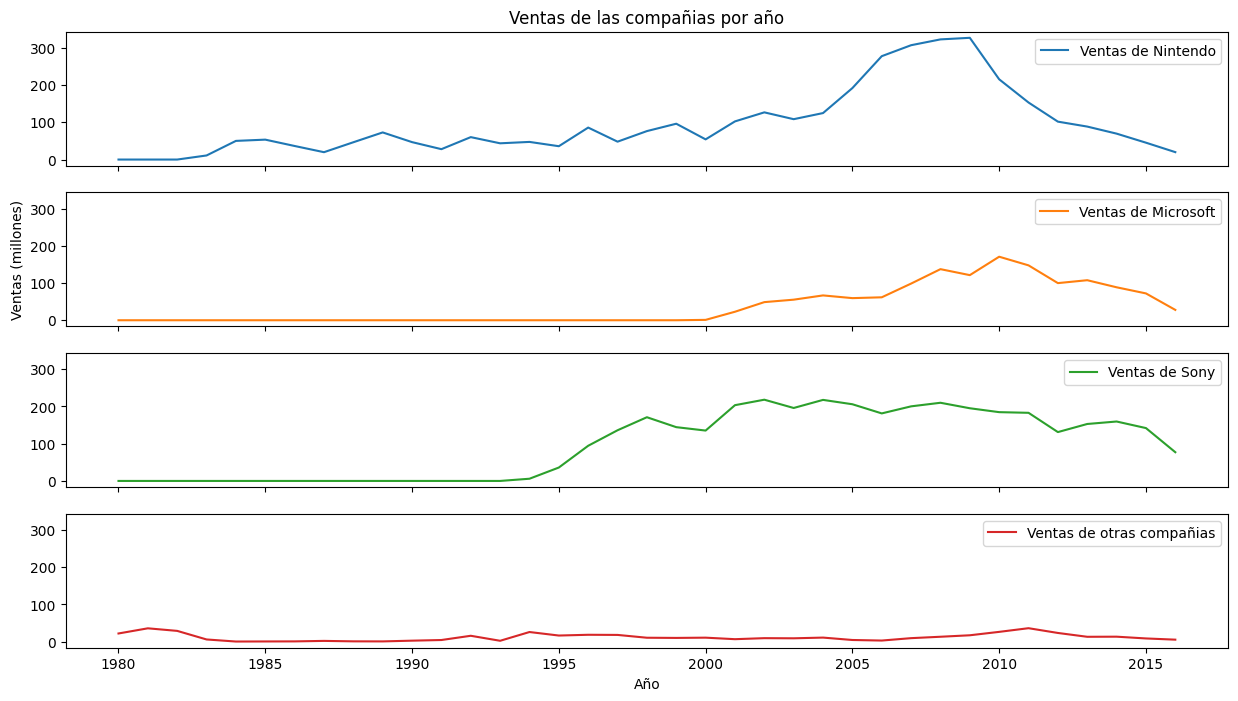

In [79]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(15,8), sharex=True, sharey=True)
ax[0].plot(ventasPorAño.index, ventasPorAño['Nintendo'], label="Ventas de Nintendo")
ax[1].plot(ventasPorAño.index, ventasPorAño['Microsoft'], label="Ventas de Microsoft", color="C1")
ax[2].plot(ventasPorAño.index, ventasPorAño['Sony'], label="Ventas de Sony", color="C2")
ax[3].plot(ventasPorAño.index, ventasPorAño['Others'], label="Ventas de otras compañias", color="C3")

ax[0].set_title("Ventas de las compañias por año")
ax[3].set_xlabel("Año")
ax[1].set_ylabel("Ventas (millones)")

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()

### 03 - Ventas de juegos por genero en cada región

A continuación se mostrarán la venta de los distintos generos de juegos en las regiones.

Para esto en primera instacia se creó un dataframe el cual se agrupa y luego se realiza un melt para reordenarlos.

En segunda instacia se configura el gráfico de barras y se visualiza

In [82]:
ventasPorGenero = dsJuegosFiltrado.groupby('Genre')[['JP_Sales', 'ventaOccidente']].sum().reset_index()
ventasPorGenero = ventasPorGenero.melt(id_vars='Genre', var_name='Region', value_name='Ventas')
ventasPorGenero.sample(10)


,Genre,Region,Ventas
3,Misc,JP_Sales,107.80
2,Fighting,JP_Sales,87.62
5,Puzzle,JP_Sales,57.08
21,Simulation,ventaOccidente,325.80
11,Strategy,JP_Sales,49.86
16,Platform,ventaOccidente,695.56
8,Shooter,JP_Sales,38.69
13,Adventure,ventaOccidente,184.82
10,Sports,JP_Sales,134.30
22,Sports,ventaOccidente,1193.27


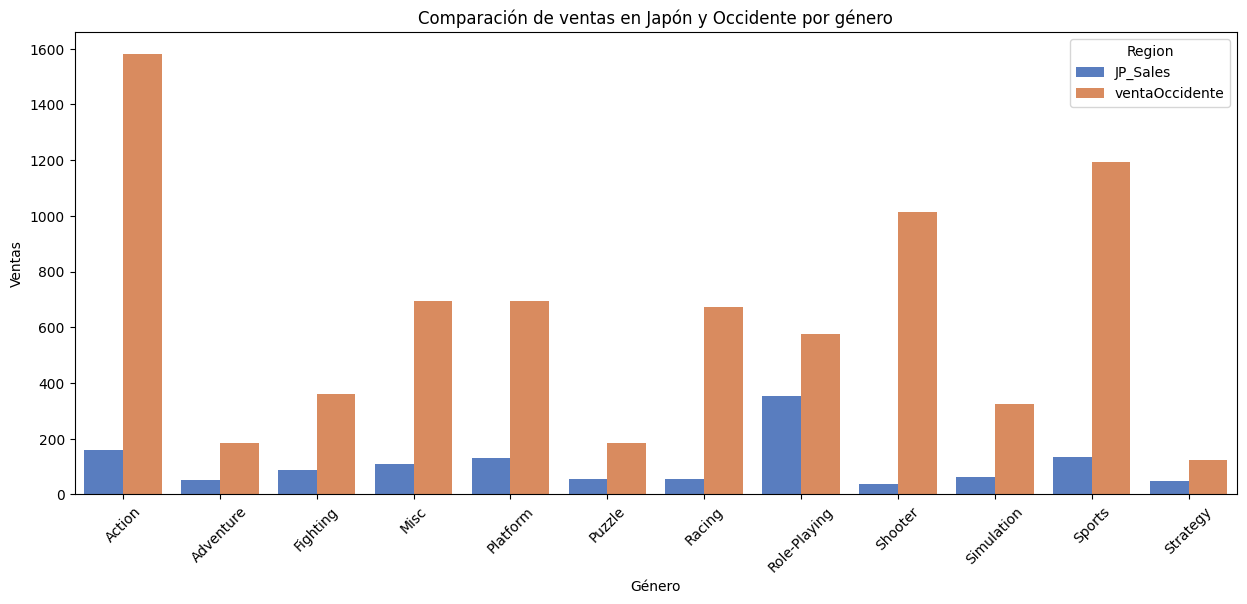

In [83]:
plt.figure(figsize=(15, 6))
sns.barplot(data=ventasPorGenero, x='Genre', y='Ventas', hue='Region', palette='muted')

plt.title('Comparación de ventas en Japón y Occidente por género')
plt.xlabel('Género')
plt.ylabel('Ventas')
plt.xticks(rotation=45)
plt.show()

### 04 - Ventas por año en cada región

A continuación se mostrará un gráfico de dispersión y un gráfico de línea que complementa, en donde se aprecian las ventas de Japón y Occidente.

Para esto en primera instacia se creó un dataframe el cual se agrupa y luego se realiza un melt para reordenarlos.

En segunda instacia se configuran los gráficos y se visualizan

Solamente se analizarán Sony, Nintendo y Microsoft.

In [95]:
ventasJPOcc = dsJuegosFiltrado.query("Company == 'Nintendo' | Company == 'Sony' | Company == 'Microsoft'")
ventasJPOcc = ventasJPOcc.groupby('Year_of_Release')[['JP_Sales', 'ventaOccidente']].sum().reset_index()
ventasJPOcc.set_index('Year_of_Release')
ventasPorRegion = ventasJPOcc.melt(id_vars='Year_of_Release', var_name='Region', value_name='Ventas')
ventasPorRegion.sample(10)


,Year_of_Release,Region,Ventas
12,1995,JP_Sales,34.71
34,1983,ventaOccidente,2.86
10,1993,JP_Sales,24.38
13,1996,JP_Sales,49.27
11,1994,JP_Sales,28.46
32,2015,JP_Sales,33.89
17,2000,JP_Sales,39.45
44,1993,ventaOccidente,19.25
66,2015,ventaOccidente,225.33
54,2003,ventaOccidente,325.07


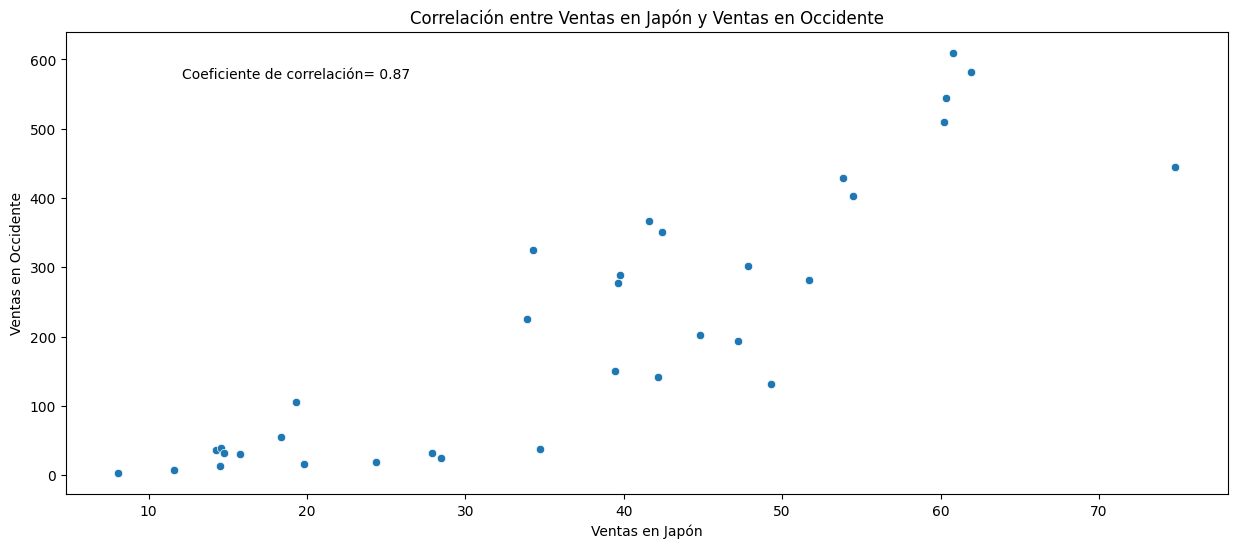

In [96]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=ventasJPOcc, x='JP_Sales', y='ventaOccidente')

plt.title('Correlación entre Ventas en Japón y Ventas en Occidente')
plt.xlabel('Ventas en Japón')
plt.ylabel('Ventas en Occidente')

correlation_coef = ventasJPOcc['JP_Sales'].corr(ventasJPOcc['ventaOccidente'])
plt.text(0.1, 0.9, f'Coeficiente de correlación= {correlation_coef:.2f}', transform=plt.gca().transAxes)

plt.show()

La visualización se aprecia que el coeficiente de correlación es de 0.87 entre las ventas de Japón con el resto del donde.

### 05 - Ventas de juegos géneros por compañia

A continuación se mostrarán la venta de los distintos generos en cada plataforma en un gráfico de Boxplot.

Para esta visualización solo se contemplará a las compañias actuales, debido a esto se tiene en cuenta que Microsoft fue la ultima de las compañias a analizar se tomo para este analisis el período comprendido entre el año 200 hasta el año 2016. Para esto se creó un nuevo dataframe con los años a analizar y se hizo una agrupación que muestre las ventas globales de cada en genero en las distintas compañias año a año.

In [93]:
ventasGeneroComp = dsJuegosFiltrado[(dsJuegosFiltrado['Year_of_Release'] >= 2000) & (dsJuegosFiltrado['Year_of_Release'] <= 2016) & (dsJuegosFiltrado['Company'] != 'Others')]
ventasGeneroComp = ventasGeneroComp.groupby(['Year_of_Release', 'Company', 'Genre'])['Global_Sales'].sum().reset_index()


ventasGeneroComp.head()

,Year_of_Release,Company,Genre,Global_Sales
0,2000,Microsoft,Sports,0.99
1,2000,Nintendo,Action,9.81
2,2000,Nintendo,Adventure,0.14
3,2000,Nintendo,Fighting,2.51
4,2000,Nintendo,Misc,2.98


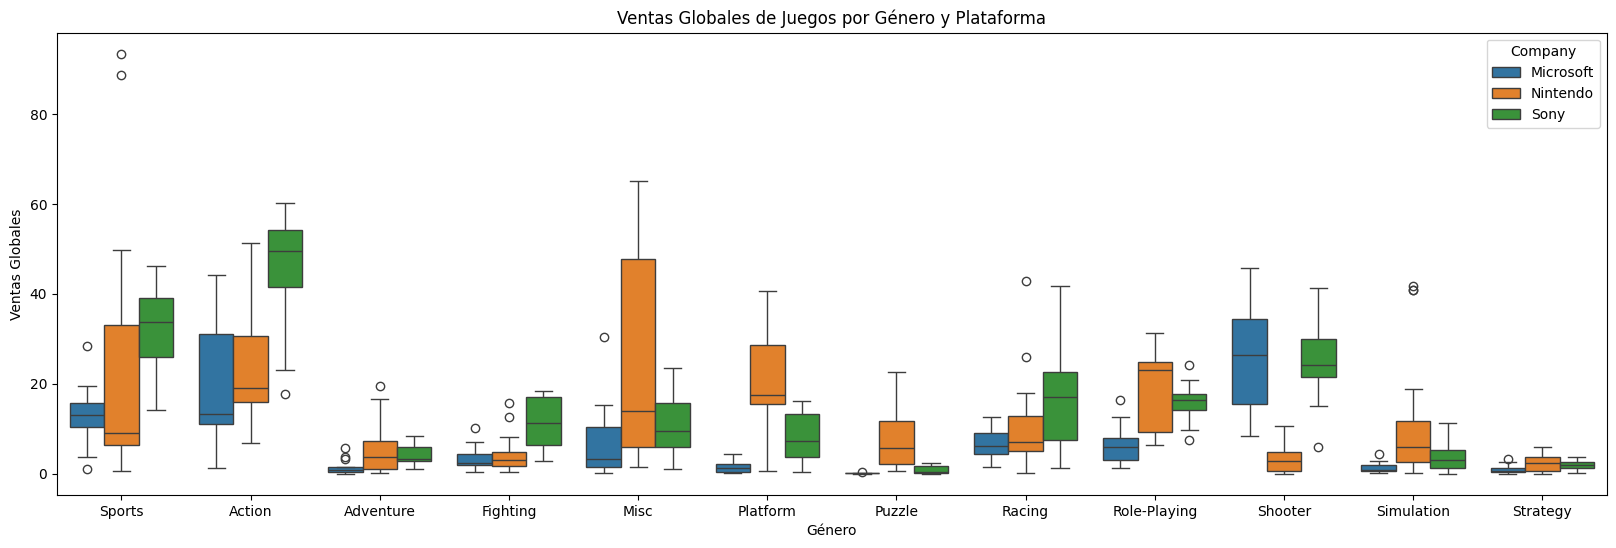

In [94]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=ventasGeneroComp, x='Genre', y='Global_Sales', hue='Company')


plt.xlabel('Género')
plt.ylabel('Ventas Globales')
plt.title('Ventas Globales de Juegos por Género y Plataforma')


plt.show()